In [28]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo
    AgglomerativeClustering
    y representa su dendograma con la función dendogram de
    scipy.cluster.hierarchy
    '''
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
                
    linkage_matrix = np.column_stack([model.children_,model.distances_,counts]).astype(float)
# Plot
    dendrogram(linkage_matrix, **kwargs)

In [30]:
# obtener iris dataset de sklearn a dataframe

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
X = df
y = iris.target

Text(0.5, 1.0, 'Clusters')

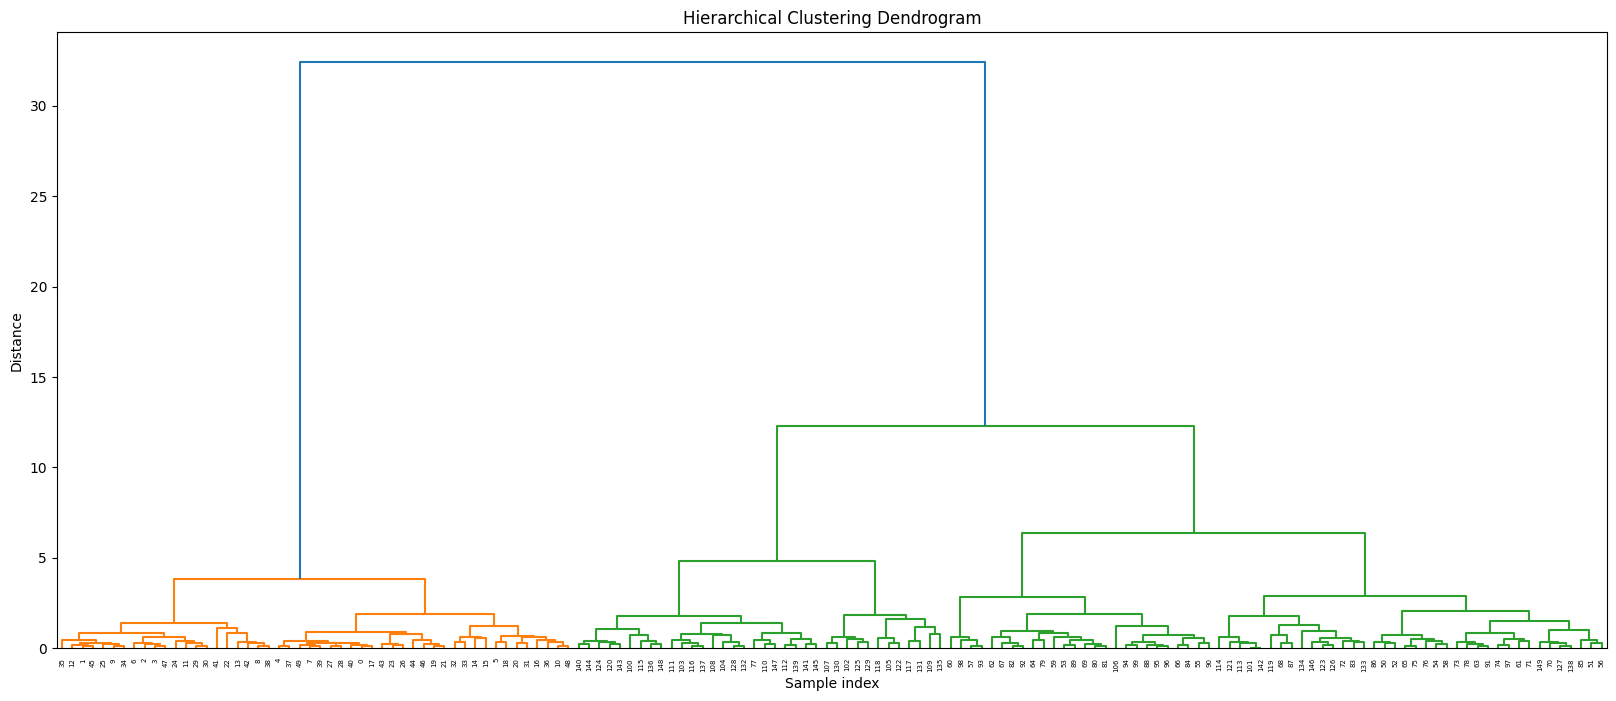

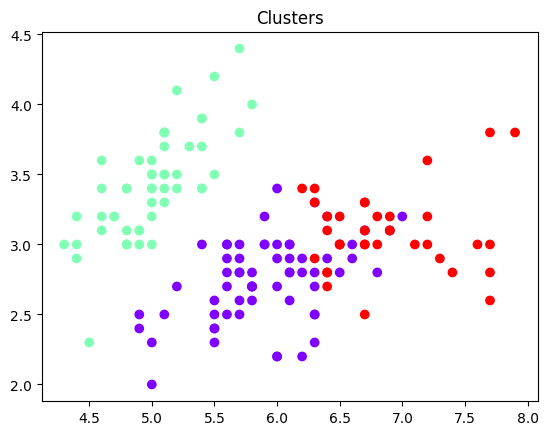

In [32]:
# generate the linkage matrix
Z = linkage(X, 'ward')

fig, ax = plt.subplots(figsize=(20, 8))
# plot the dendrogram
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')

_ = dendrogram(Z, no_labels=False, ax=ax)
# Perform hierarchical clustering
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X)
labels = clustering.labels_
fig, ax = plt.subplots()

scatter = ax.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=labels, cmap='rainbow')

ax.set_title('Clusters')

In [34]:
# calcular “índices silhouette”
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)


0.5543236611296419